In [44]:
import matplotlib.pyplot as mplt
import numpy as np
import ast
import csv
import os


# set matplotlib to print inline (Jupyter)
%matplotlib inline

pth = '../data/dump/'
files = os.listdir(pth)

def readDump(source):
    with open(pth + source, 'rb') as ff:
        out = ff.read()
        out = out.decode('utf-8')
        return out.split('\n')

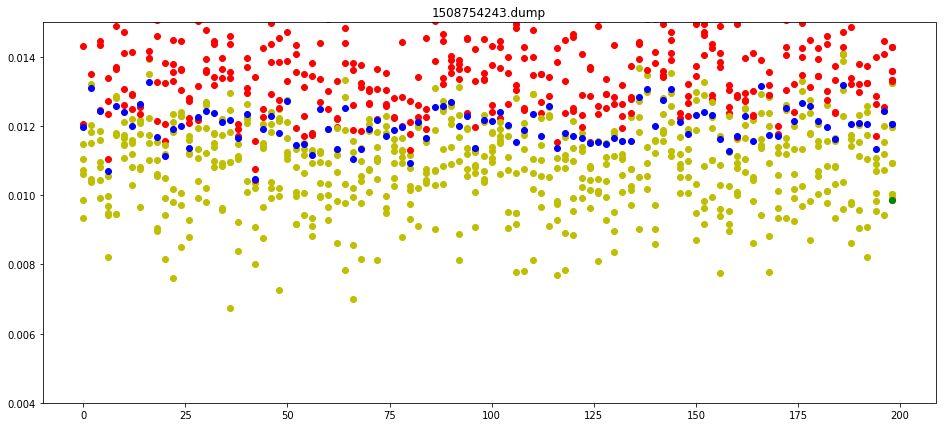

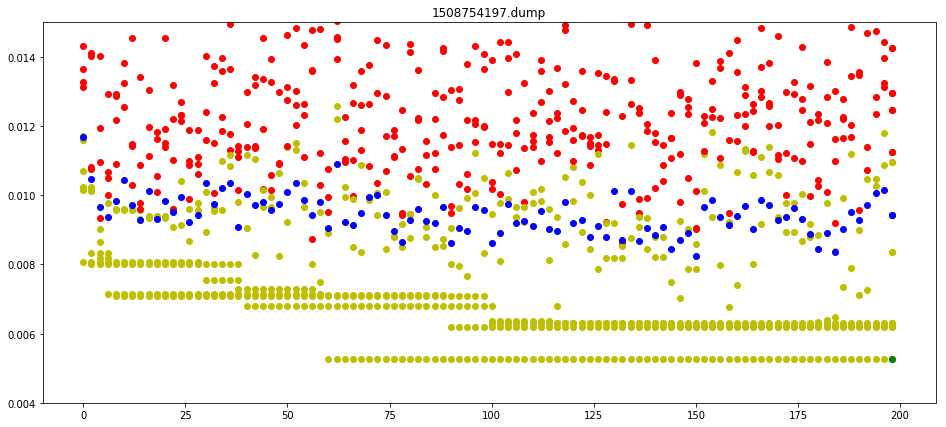

In [48]:
bests = list()
for f in files:
    raw_data = readDump(f)[2:]
    sep_gens = [raw_data[i-4: i] for i in range(4, len(raw_data), 4)]
    gen_num = [int(j.split('***')[1]) for j in [i[0] for i in sep_gens]]
    gen_gen = [ast.literal_eval(i[1]) for i in sep_gens]
    gen_fit = [ast.literal_eval(i[2]) for i in sep_gens]
    gen_sur = [ast.literal_eval(i[3]) for i in sep_gens]
    
    # plotting data
    mplt.figure(figsize=(16, 7))
    mplt.title(f)
    mplt.ylim((0.004, 0.015))
    view_gens = [gen_num[i] for i in range(0, len(gen_num), 2)]
    view_gens.append(gen_num[-1])
    for i in view_gens:
        avg = 0
        for j in range(len(gen_fit[i])):
            avg += gen_fit[i][j]
            if j not in gen_sur[i]:
                mplt.scatter(gen_num[i], gen_fit[i][j], color='r')
            else:
                mplt.scatter(gen_num[i], gen_fit[i][j], color='y')
        avg = avg / len(gen_fit[i])
        mplt.scatter(gen_num[i], avg, color='b')
    mplt.scatter(gen_num[len(gen_num) - 1], min(gen_fit[len(gen_num) - 1]), color='g')
    l_gen = gen_gen[len(gen_num) - 1]
    l_fit = gen_fit[len(gen_num) - 1]
    bests.append((f, l_gen[l_fit.index(min(l_fit))]))


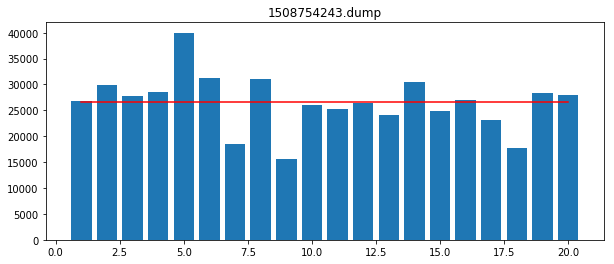

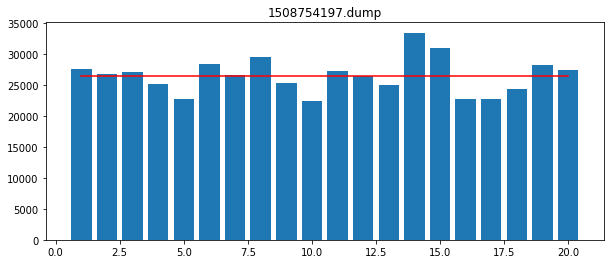

In [49]:
def csvRead(file, filepth='../data/', delimiter=';'):
    with open(filepth + file, newline='') as csv_file:
        csv_data = csv.reader(csv_file, delimiter=delimiter)
        return list(csv_data)[1:]

def loadLittleInfo(csv_reader_out):
    clients = [int(data_point[2]) for data_point in csv_reader_out]
    little_info = np.array(clients)
    return little_info

cc = csvRead('neighborhood_description.csv')

for f, best in bests:
    days = set(best)
    total_revisions = [
        sum(info[i] for i in range(len(best)) if best[i] == d)
        for d in days]
    
    avg = np.mean(total_revisions)
    
    mplt.figure(figsize=(10, 4))
    mplt.title(f)
    mplt.bar(list(days), total_revisions)
    mplt.plot([1, len(days)], [avg, avg], color="red")
